
Objectives:
1. How much did each team spent(total amount, average amount)
2. How team stack up with each type
3. How much did each team spent on each type
4. Find out the type most sought by teams
5. Find the most expensive players sold

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

auction_data = pd.read_csv("ipl_2025_auction_players.csv")
auction_data.head()

,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.00
1,Rajat Patidar,RCB,BAT,-,11.00
2,Yash Dayal,RCB,BOWL,-,5.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
4,Suryakumar Yadav,MI,BAT,-,16.35


In [3]:
auction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Players  623 non-null    object
 1   Team     623 non-null    object
 2   Type     623 non-null    object
 3   Base     623 non-null    object
 4   Sold     623 non-null    object
dtypes: object(5)
memory usage: 24.5+ KB


In [4]:
auction_data.describe()

,Players,Team,Type,Base,Sold
count,623,623,623,623,623
unique,620,11,4,9,72
top,Daryl Mitchell,-,BOWL,0.30,TBA
freq,2,395,216,322,293


In [5]:
#Checking for null values
auction_data.isnull().sum()

,0
Players,0
Team,0
Type,0
Base,0
Sold,0


In [6]:
#Checking for shape
auction_data.shape

(623, 5)

In [7]:
# Converting Sold to float, handling 'Unsold' values
auction_data["Sold"] = pd.to_numeric(auction_data["Sold"].str.replace("L", ""), errors='coerce')

# Replacing NaN with 0
auction_data["Sold"] = auction_data["Sold"].fillna(0)

In [8]:
#Checking total money spent by each team
money_spent_by_each_team = auction_data.groupby("Team")["Sold"].sum().drop('-') #Done to only have players sold
money_spent_by_each_team = money_spent_by_each_team.sort_values(ascending=False)
print(money_spent_by_each_team)


Team
CSK     119.95
GT      119.85
MI      119.80
SRH     119.80
RR      119.70
PBKS    119.65
LSG     119.60
RCB     119.25
DC      116.55
KKR     107.95
Name: Sold, dtype: float64


CSK spent the most money while KKR spent the least money in the auction

Text(0, 0.5, 'Money spent (₹ Crore)')

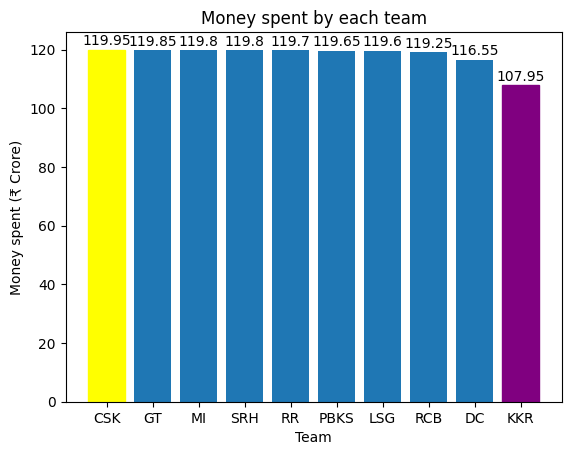

In [9]:
bars = plt.bar(money_spent_by_each_team.index, money_spent_by_each_team.values)
#For values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

# Highlightinf the extremes
bars[0].set_color('yellow')
bars[-1].set_color('purple')

plt.title("Money spent by each team")
plt.xlabel("Team")
plt.ylabel("Money spent (₹ Crore)")

In [10]:
#Checking for types
auction_data['Type'].unique()

array(['BAT', 'BOWL', 'AR', 'WK'], dtype=object)

In [11]:
#Finding the count of types bought by each team, to see how they stack up
count_of_types_bought = auction_data.groupby("Team")["Type"].value_counts()
count_of_types_bought.drop('-', inplace = True)  #Dropping unsold
print(count_of_types_bought)

Team  Type
CSK   AR      11
      BAT      7
      BOWL     7
DC    AR       9
      BAT      8
      BOWL     6
GT    AR      10
      BOWL     9
      BAT      6
KKR   BAT      8
      BOWL     7
      AR       6
LSG   BOWL    10
      AR       7
      BAT      7
MI    BOWL    10
      AR       7
      BAT      6
PBKS  AR      11
      BAT      7
      BOWL     7
RCB   BOWL     9
      AR       7
      BAT      6
RR    BOWL    10
      BAT      6
      AR       4
SRH   BAT      7
      BOWL     7
      AR       6
Name: count, dtype: int64


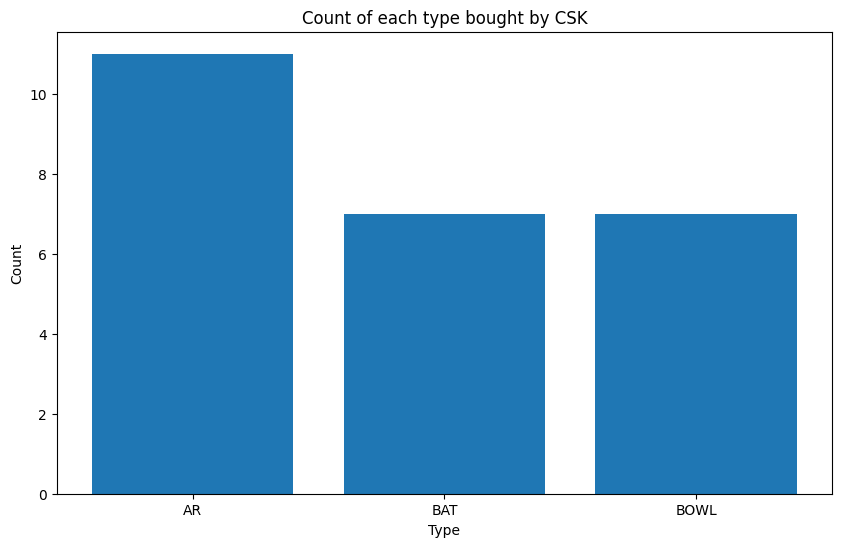

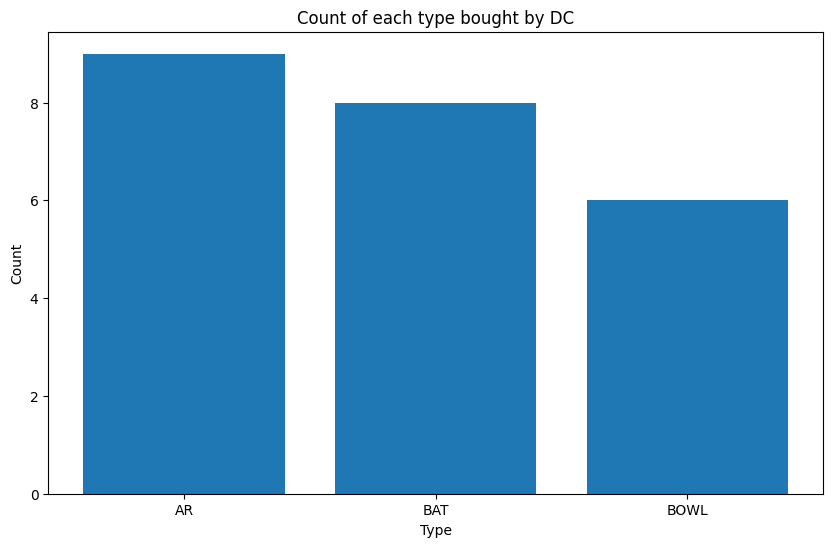

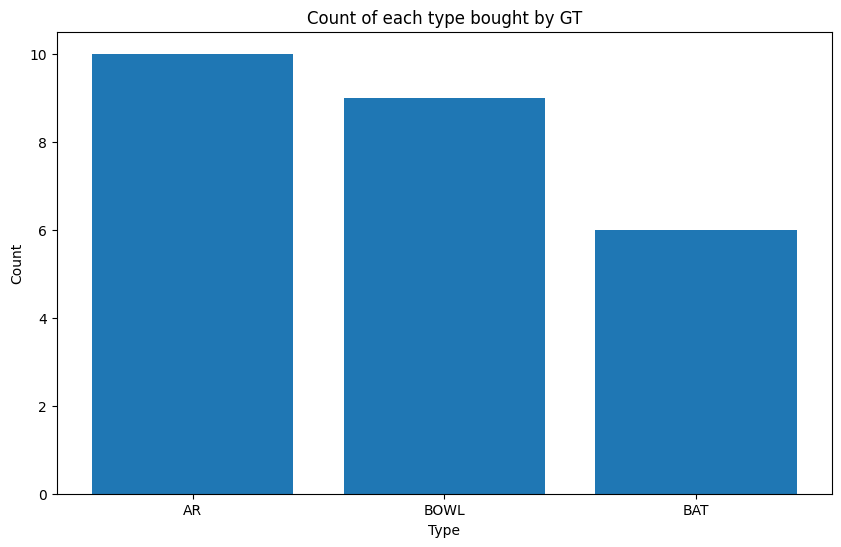

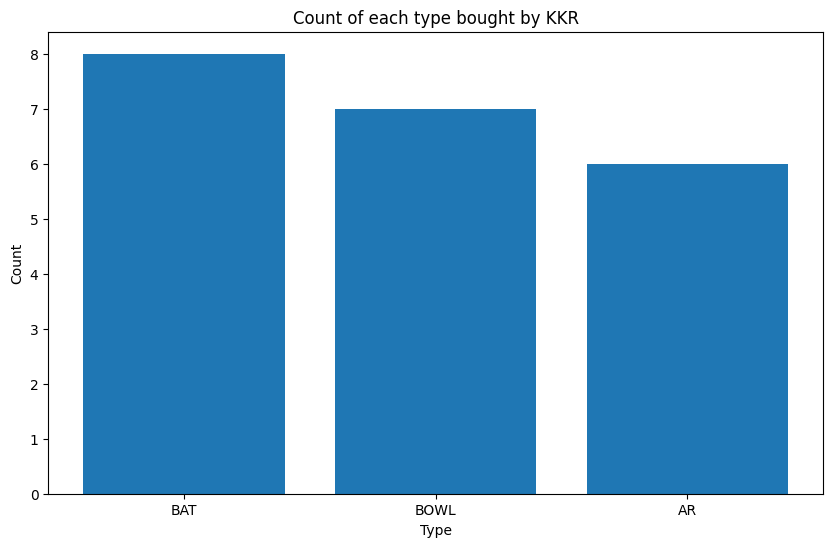

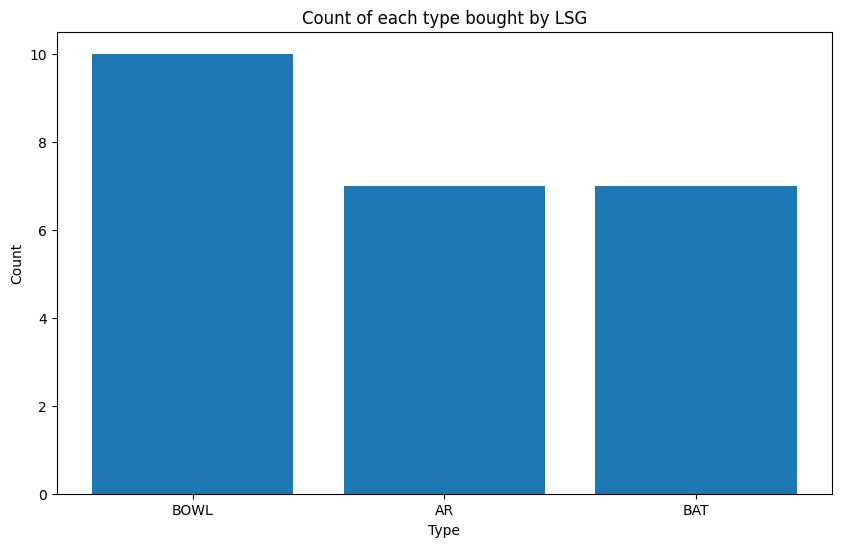

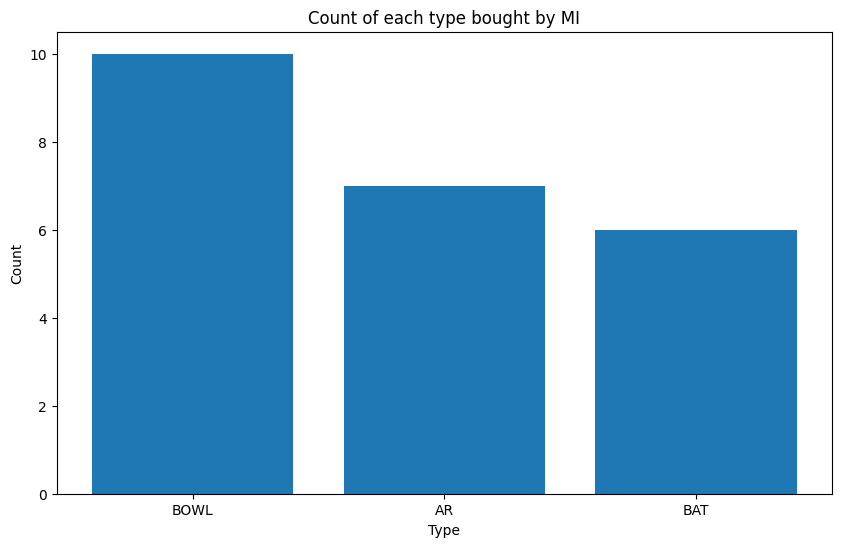

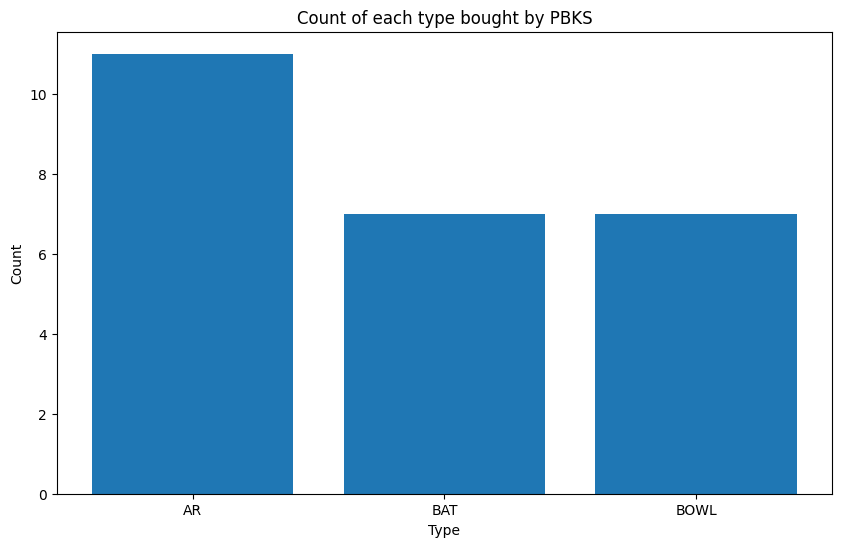

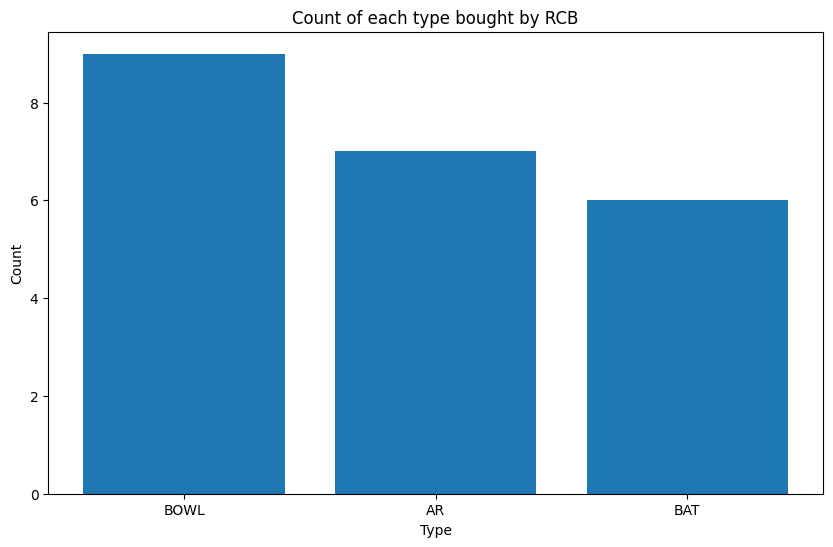

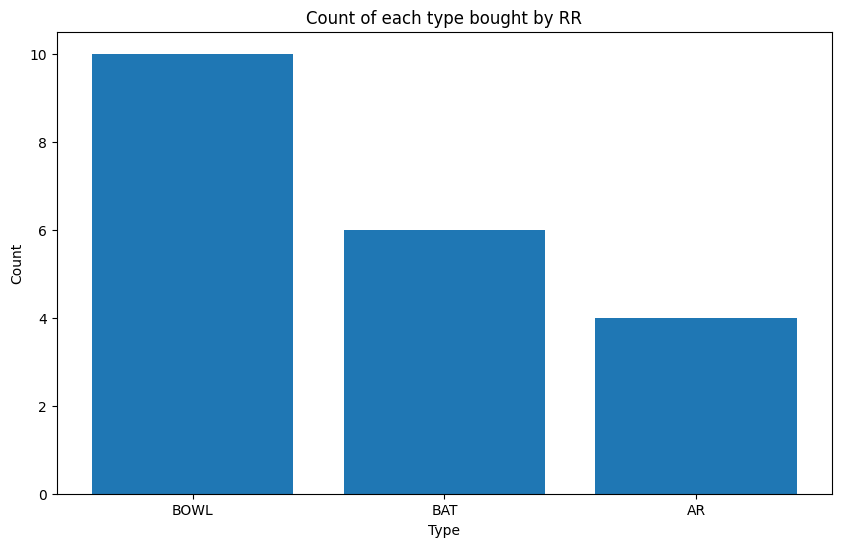

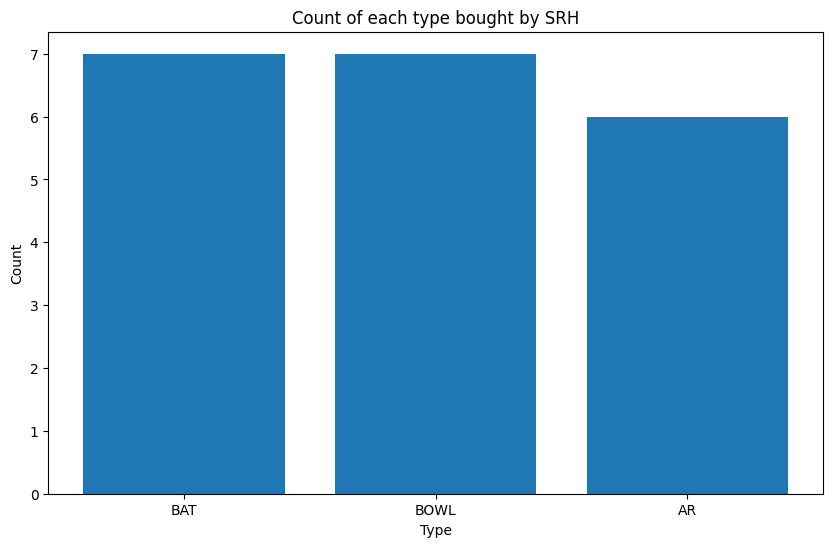

In [12]:
#Plotting count of each type bought for each team
for team in count_of_types_bought.index.get_level_values(0).unique():
    team_data = count_of_types_bought.loc[team]
    plt.figure(figsize=(10, 6))
    plt.bar(team_data.index, team_data.values)
    plt.title(f'Count of each type bought by {team}')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.show()

In [13]:
#Money spent by each team for each type
money_spent_by_team_for_type = auction_data.groupby(["Team", "Type"])["Sold"].agg(["sum", "mean"]).drop('-')
money_spent_by_team_for_type.rename(columns={"sum": "Total Money Spent", "mean": "Average Money Spent"}, inplace=True)
money_spent_by_team_for_type

Total Money Spent  Average Money Spent
Team Type                                        
CSK  AR                54.55             4.959091
     BAT               32.80             4.685714
     BOWL              32.60             4.657143
DC   AR                23.35             2.594444
     BAT               46.50             5.812500
     BOWL              46.70             7.783333
GT   AR                26.50             2.650000
     BAT               37.80             6.300000
     BOWL              55.55             6.172222
KKR  AR                54.15             9.025000
     BAT               25.65             3.206250
     BOWL              28.15             4.021429
LSG  AR                14.60             2.085714
     BAT               58.85             8.407143
     BOWL              46.15             4.615000
MI   AR                37.45             5.350000
     BAT               34.90             5.816667
     BOWL              47.45             4.745000
PBKS AR                37.55             3.413636
     BAT               39.10             5.585714
     BOWL              43.00             6.142857
RCB  AR                22.40             3.200000
     BAT               56.80             9.466667
     BOWL              40.05             4.450000
RR   AR                36.55             9.137500
     BAT               45.20             7.533333
     BOWL              37.95             3.795000
SRH  AR                47.75             7.958333
     BAT               52.35             7.478571
     BOWL              19.70             2.814286

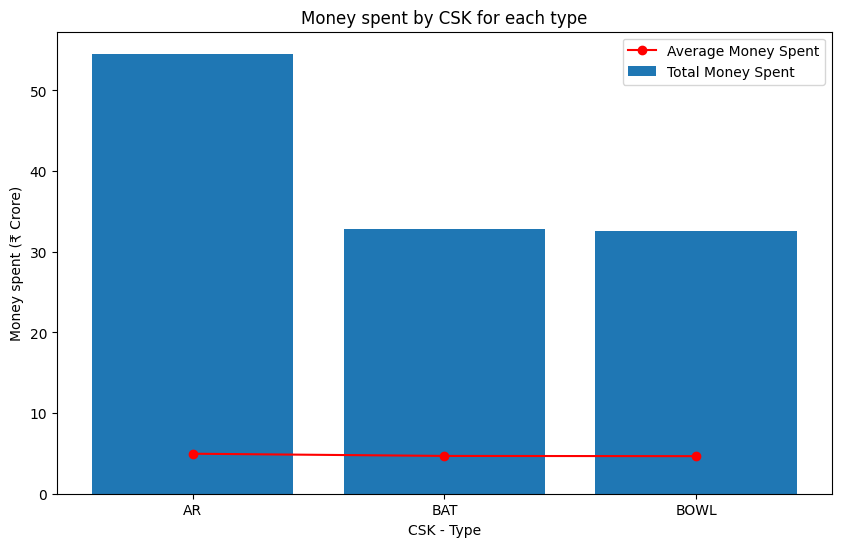

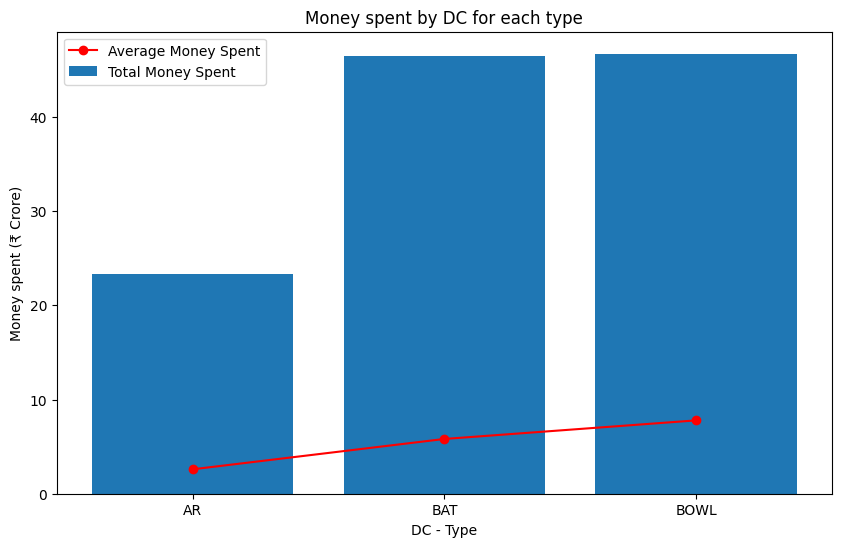

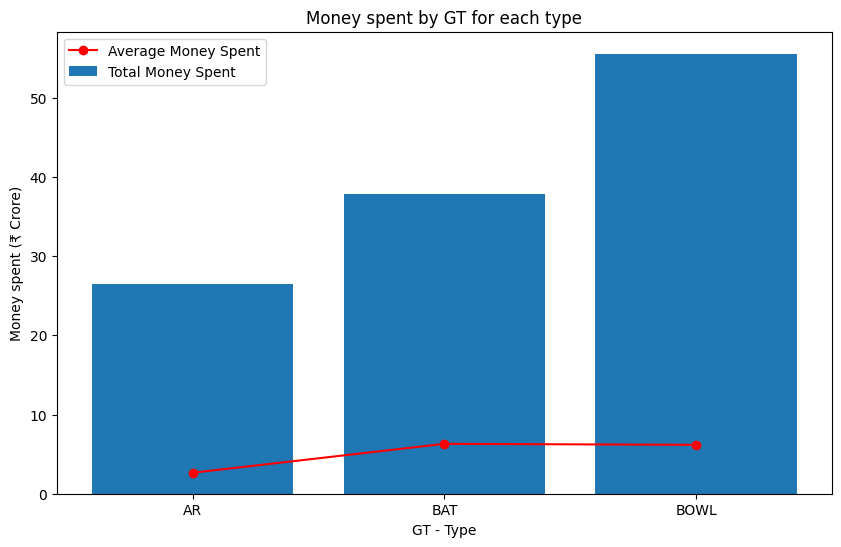

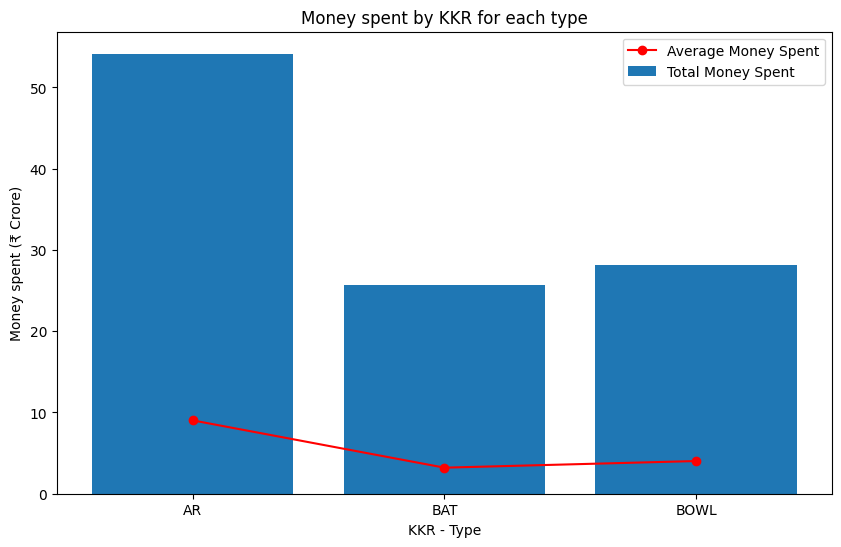

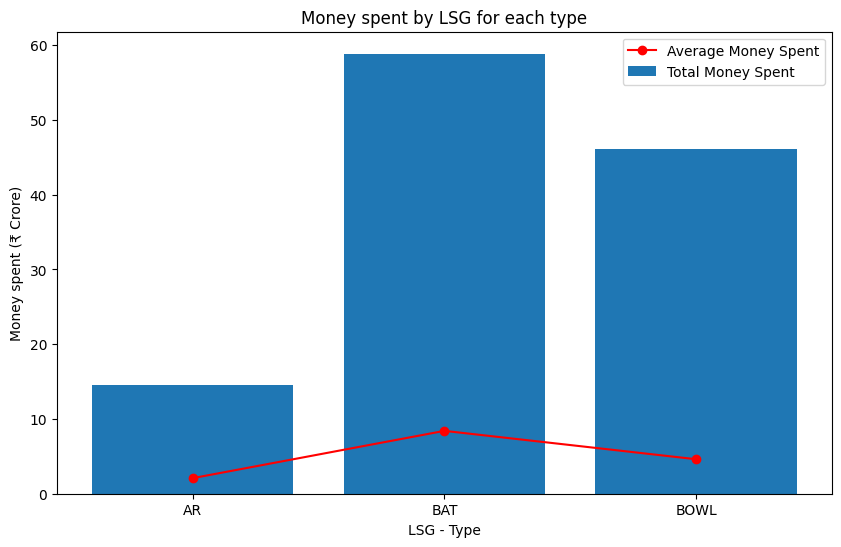

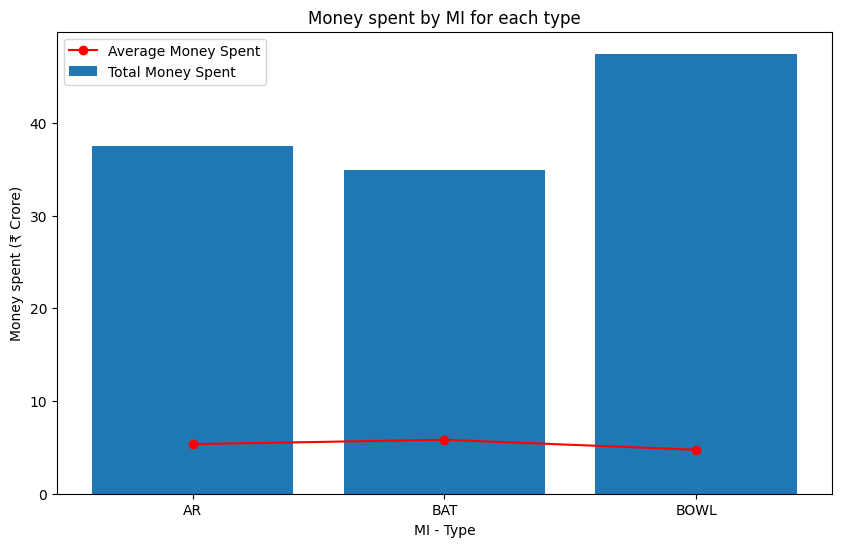

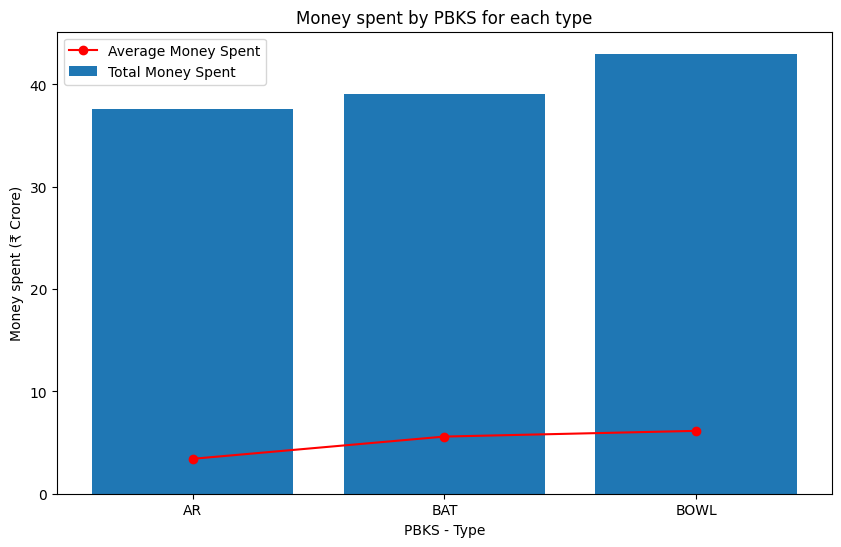

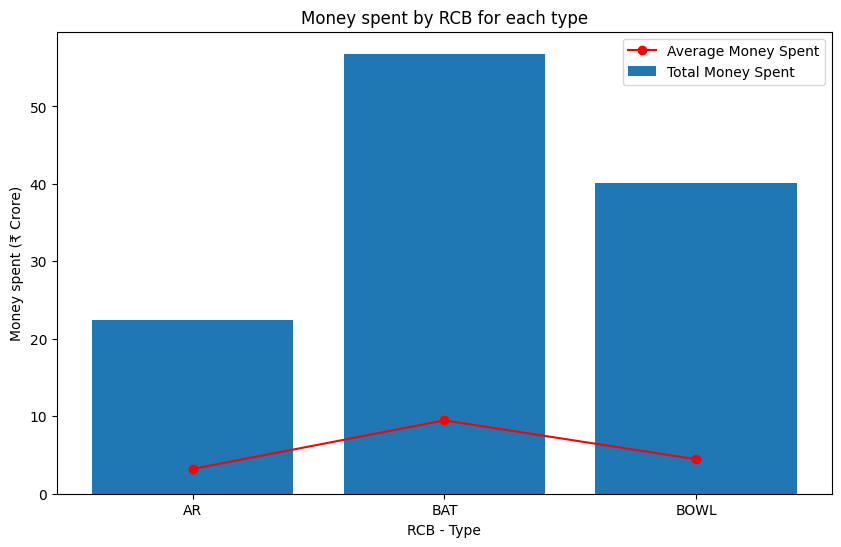

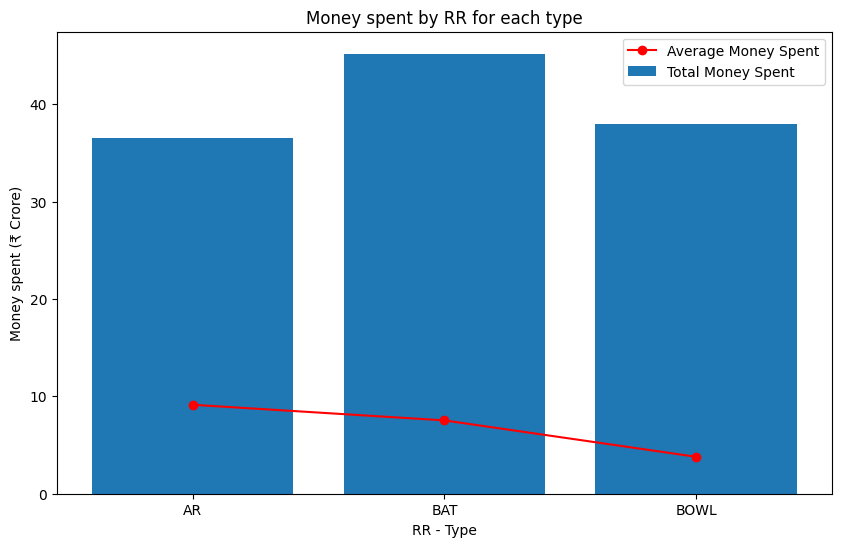

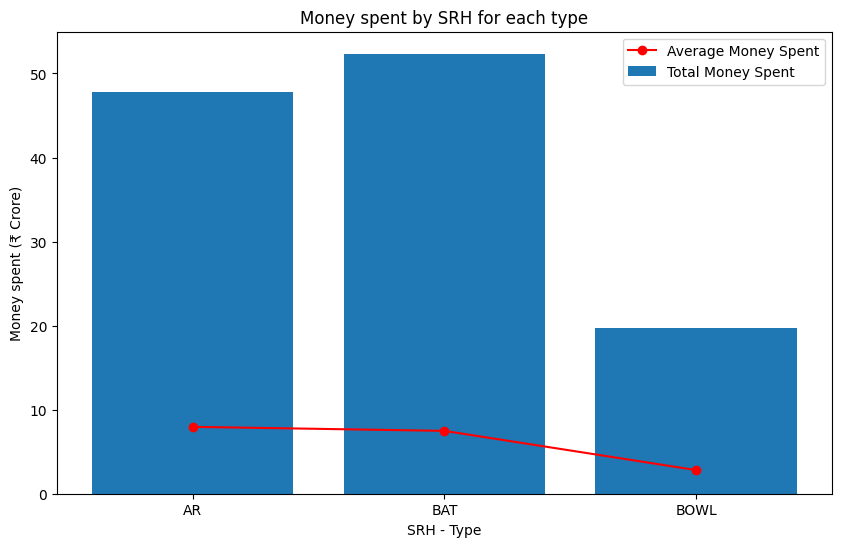

In [14]:
#Plotting for each team
for team in money_spent_by_team_for_type.index.get_level_values(0).unique():
    team_data = money_spent_by_team_for_type.loc[team]
    plt.figure(figsize=(10, 6))
    total_spent = team_data["Total Money Spent"]
    average_spent = team_data["Average Money Spent"]

    bars = plt.bar(team_data.index, total_spent, label="Total Money Spent")
    plt.plot(team_data.index, average_spent, color='red', marker='o', label="Average Money Spent")

    plt.legend()

    plt.xlabel(f'{team} - Type')
    plt.ylabel('Money spent (₹ Crore)')
    plt.title(f'Money spent by {team} for each type')

In [15]:
#Money Spent on each type
money_spent_on_each_type = auction_data.groupby("Type")["Sold"].sum()
money_spent_on_each_type = money_spent_on_each_type.sort_values(ascending = False)
money_spent_on_each_type

,Sold
Type,
BAT,429.95
BOWL,397.30
AR,354.85
WK,0.00


In [16]:
#Finding the average money per type
average_money_per_type = auction_data.groupby("Type")["Sold"].mean()
average_money_per_type = average_money_per_type.sort_values(ascending = False)
average_money_per_type

,Sold
Type,
BAT,2.251047
BOWL,1.839352
AR,1.650465
WK,0.000000


Most money was spent on Batsmans

In [17]:
#Finding the most sought type
most_sought_type = auction_data.groupby("Type")["Sold"].count()
most_sought_type = most_sought_type.sort_values(ascending=False)
most_sought_type.head(1)


,Sold
Type,
BOWL,216


Bowlers were the most sought after this auction


In [18]:
#Most expensive players top 5
top_five_most_expensive = auction_data.sort_values(by="Sold", ascending=False).head(5)
top_five_most_expensive

,Players,Team,Type,Base,Sold
48,Rishabh Pant,LSG,BAT,2.00,27.00
47,Shreyas Iyer,PBKS,BAT,2.00,26.75
66,Venkatesh Iyer,KKR,AR,2.00,23.75
8,Heinrich Klaasen,SRH,BAT,-,23.00
39,Nicholas Pooran,LSG,BAT,-,21.00


In [19]:
#Removing those who were retained
top_most_expensive = auction_data.sort_values(by="Sold", ascending=False)
top_five_most_expensive = top_most_expensive[top_most_expensive["Base"] != "-"].head(5)
top_five_most_expensive


,Players,Team,Type,Base,Sold
48,Rishabh Pant,LSG,BAT,2.00,27.00
47,Shreyas Iyer,PBKS,BAT,2.00,26.75
66,Venkatesh Iyer,KKR,AR,2.00,23.75
52,Yuzvendra Chahal,PBKS,BOWL,2.00,18.00
50,Arshdeep Singh,PBKS,BOWL,2.00,18.00


In [20]:
#Most expensive players in each type
most_expensive_players = auction_data.groupby("Type")["Sold"].idxmax()
most_expensive_players = auction_data.loc[most_expensive_players]
most_expensive_players

,Players,Team,Type,Base,Sold
66,Venkatesh Iyer,KKR,AR,2.00,23.75
48,Rishabh Pant,LSG,BAT,2.00,27.00
3,Jasprit Bumrah,MI,BOWL,-,18.00
621,Hardik Tamore,-,WK,0.30,0.00
